In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import tensorflow as tf

In [ ]:
cols = ['fLength','fWidth', 'fSize', 'fConc', 'fConcl', 'fAsyn', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('./datasets/magic04.data', names=cols)
df.head(3)

In [ ]:
df['class'].unique()

In [ ]:
df["class"] = (df['class'] == 'g').astype(int)
df['class'].unique()

In [ ]:
df.head(2)

In [ ]:
"""
for label in cols[:-1]:
    plt.hist(df[df['class'] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df['class'] == 0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel('probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()
"""

In [ ]:
# Train, validation and test dataset

train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)
    
    data =  np.hstack((x, np.reshape(y, (-1, 1))))

    return data, x, y 

In [ ]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=True)
test, x_test, y_test = scale_dataset(test, oversample=True)

In [ ]:
# kNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [96]:
def plot_history(history):
    fig, (aux1, axu2) = plt.subplots(1, 2, figsize=(10, 4))
    aux1.plot(history.history['loss'], label='loss')
    aux1.plot(history.history['val_loss'], label='val_loss')
    aux1.set_xlabel('Epoch')
    aux1.set_ylabel('Binary crossentropy')
    aux1.grid(True)
    
    axu2.plot(history.history['accuracy'], label='accuracy')
    axu2.plot(history.history['val_accuracy'], label='val_accuracy')
    axu2.set_xlabel('Epoch')
    axu2.set_ylabel('Accuracy')
    axu2.grid(True)
    
    plt.show()


In [106]:
# Neural net
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, _batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid'),    
    ])
    
    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
              metrics=['accuracy'])
    
    history = nn_model.fit(
        x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose =False
    )
    return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


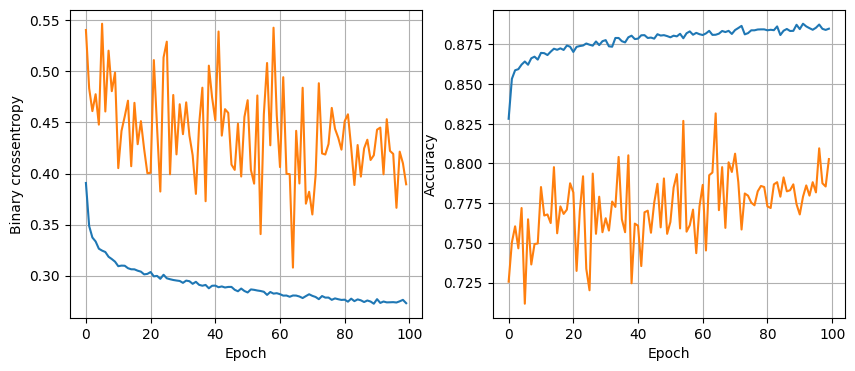

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.8689 - loss: 0.3177
16 nodes, dropout 0, lr 0.01, batch size 64


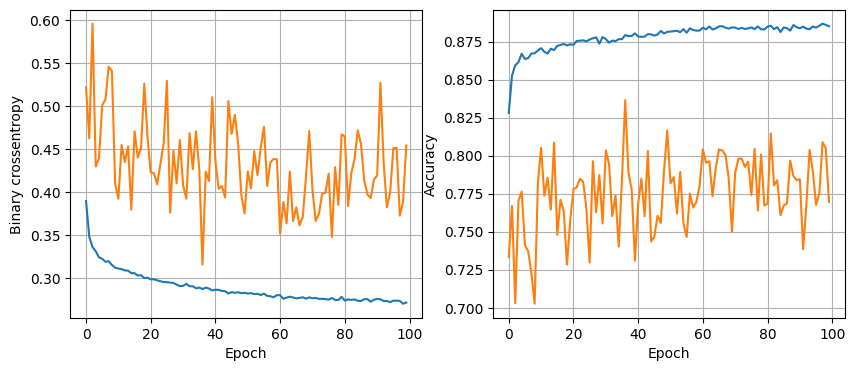

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.8688 - loss: 0.3141
16 nodes, dropout 0, lr 0.01, batch size 128


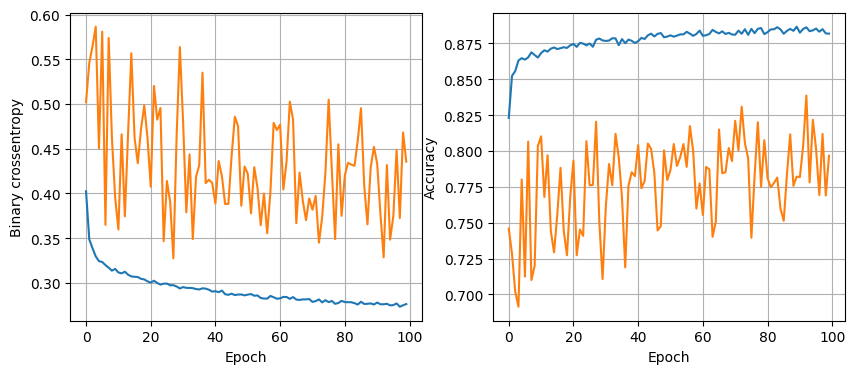

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8674 - loss: 0.3151
16 nodes, dropout 0, lr 0.005, batch size 32


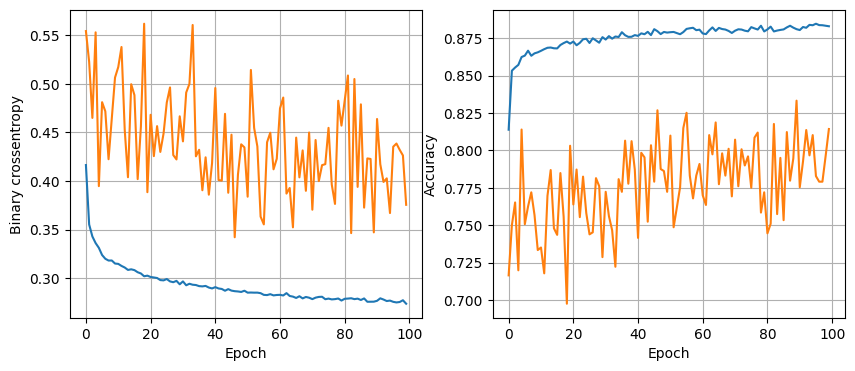

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8665 - loss: 0.3081
16 nodes, dropout 0, lr 0.005, batch size 64


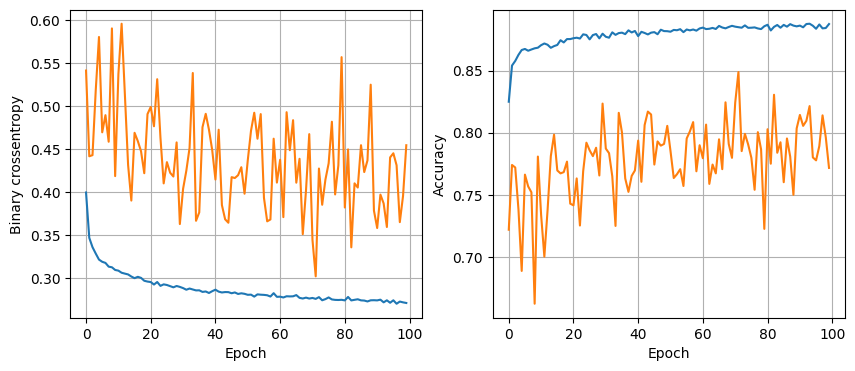

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8643 - loss: 0.3247
16 nodes, dropout 0, lr 0.005, batch size 128


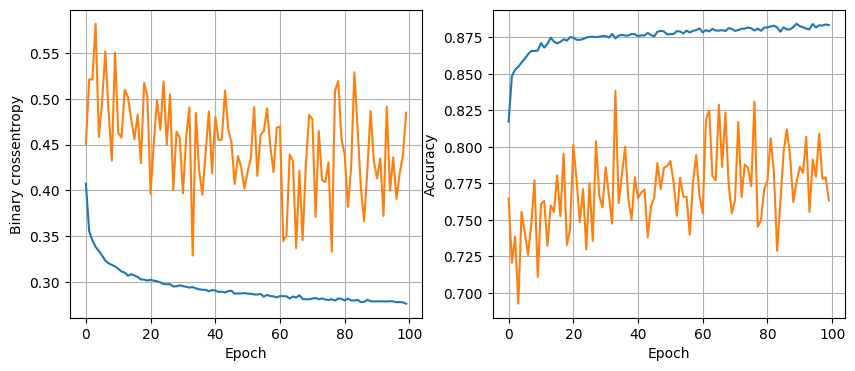

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8613 - loss: 0.3371  
16 nodes, dropout 0, lr 0.001, batch size 32


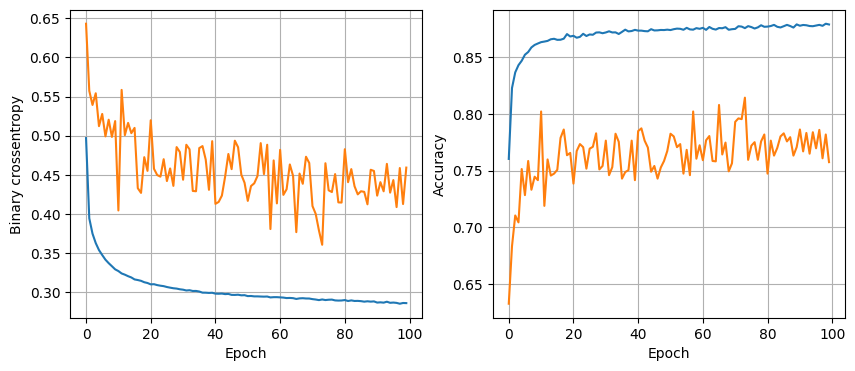

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8652 - loss: 0.3067  
16 nodes, dropout 0, lr 0.001, batch size 64


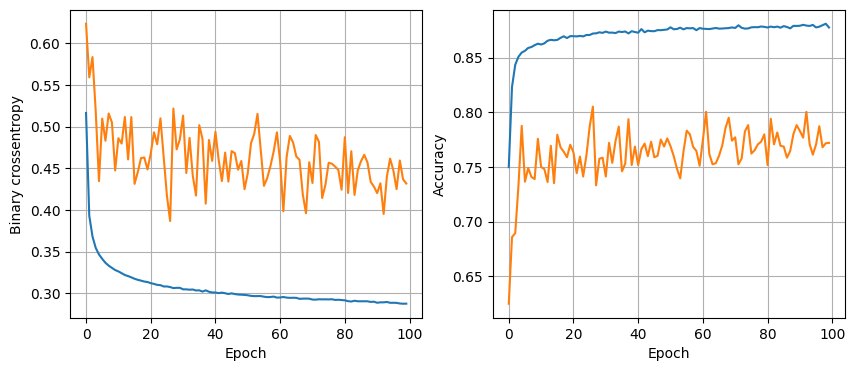

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8720 - loss: 0.3121
16 nodes, dropout 0, lr 0.001, batch size 128


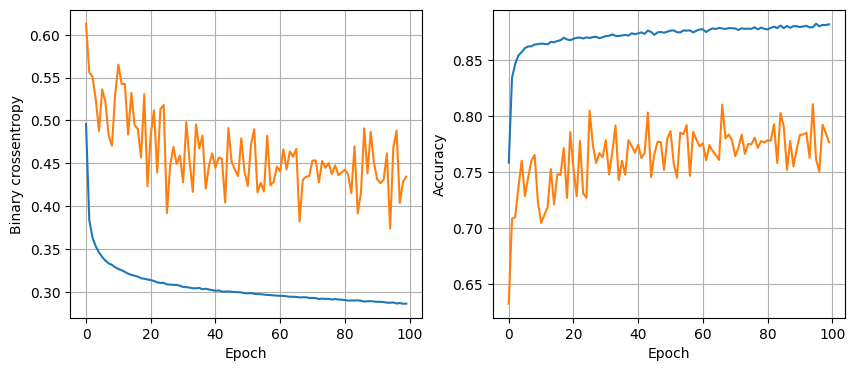

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8668 - loss: 0.3082
16 nodes, dropout 0.2, lr 0.01, batch size 32


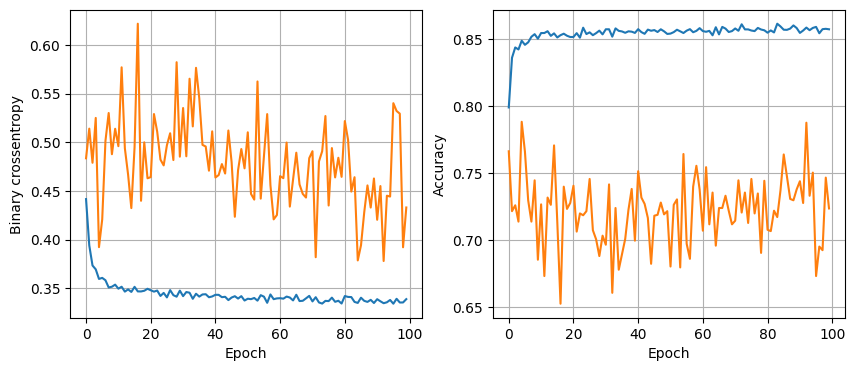

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8677 - loss: 0.3297
16 nodes, dropout 0.2, lr 0.01, batch size 64


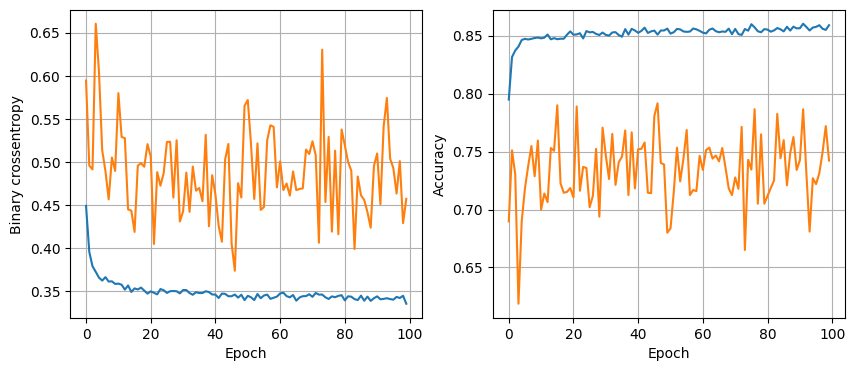

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8694 - loss: 0.3271
16 nodes, dropout 0.2, lr 0.01, batch size 128


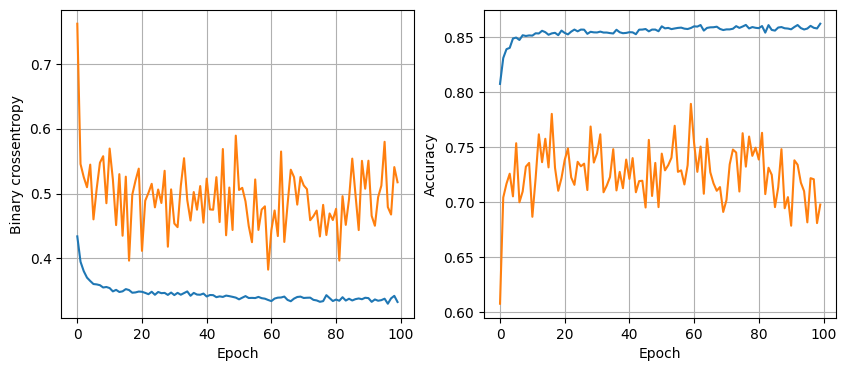

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8644 - loss: 0.3213
16 nodes, dropout 0.2, lr 0.005, batch size 32


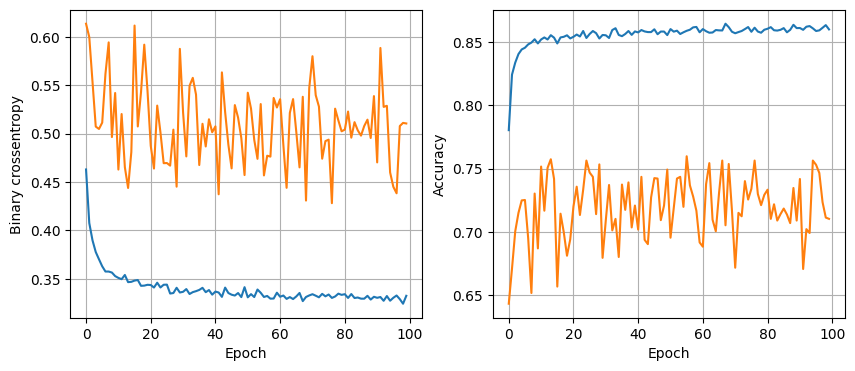

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8668 - loss: 0.3178
16 nodes, dropout 0.2, lr 0.005, batch size 64


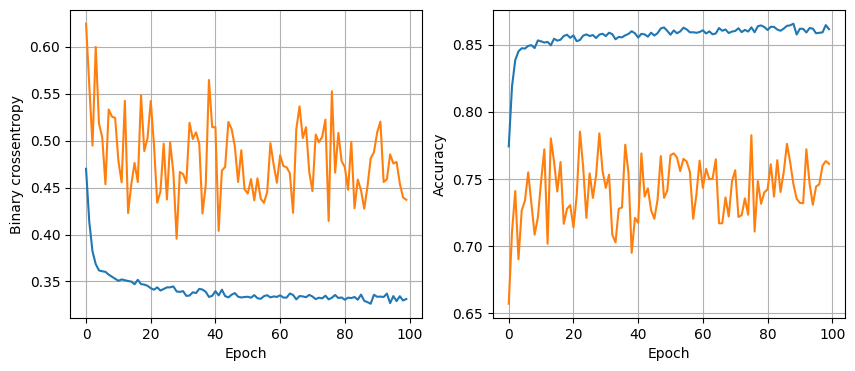

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8689 - loss: 0.3168
16 nodes, dropout 0.2, lr 0.005, batch size 128


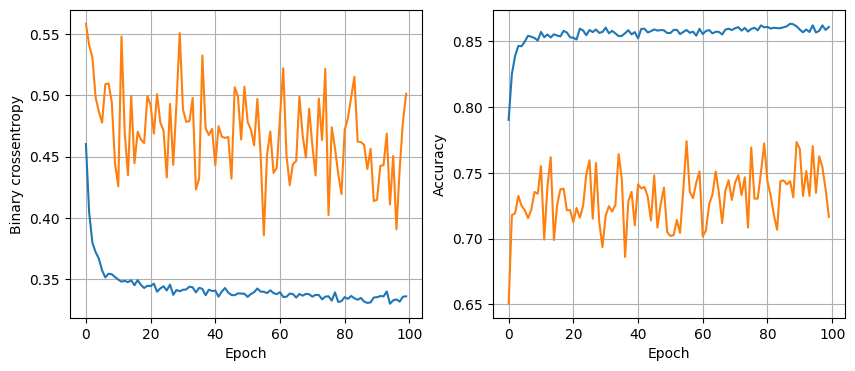

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8691 - loss: 0.3174
16 nodes, dropout 0.2, lr 0.001, batch size 32


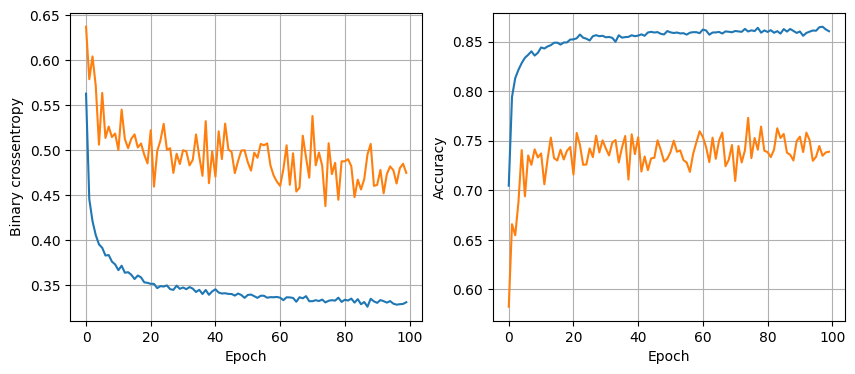

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8697 - loss: 0.3142
16 nodes, dropout 0.2, lr 0.001, batch size 64


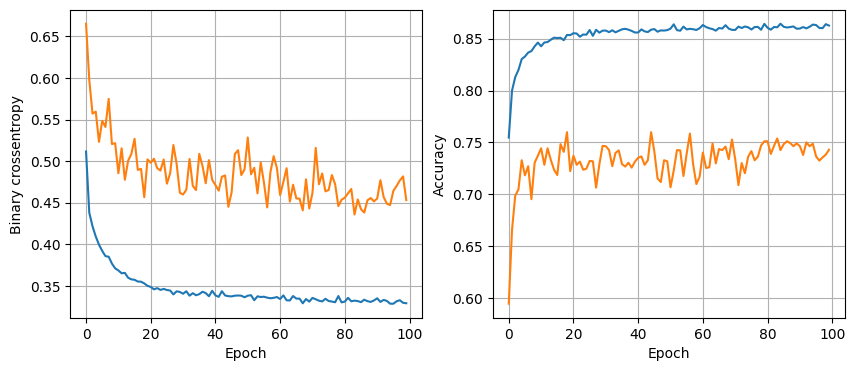

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8700 - loss: 0.3174
16 nodes, dropout 0.2, lr 0.001, batch size 128


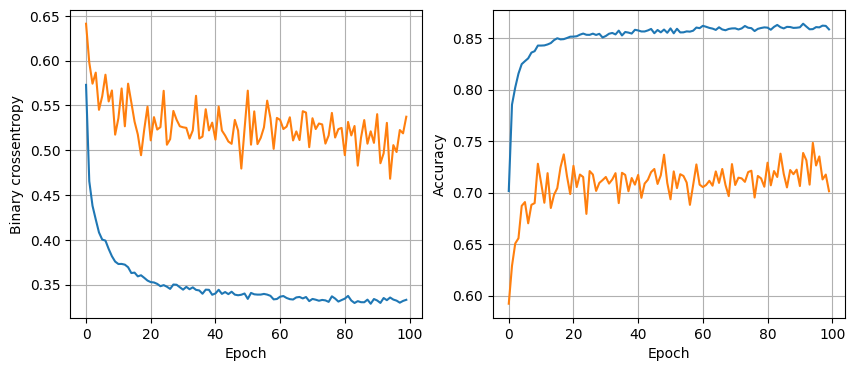

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8652 - loss: 0.3142
32 nodes, dropout 0, lr 0.01, batch size 32


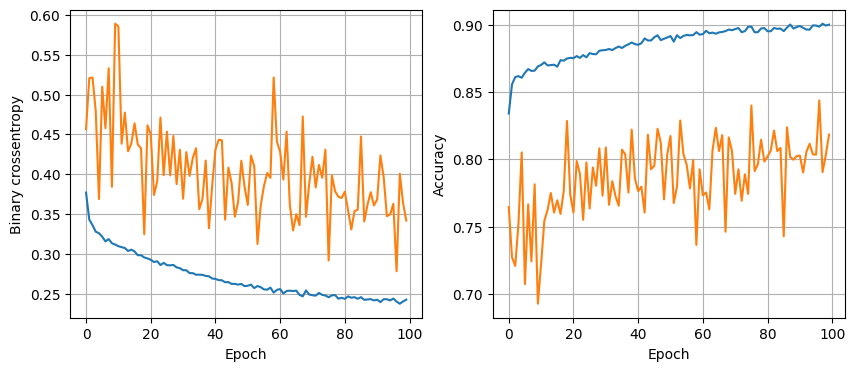

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8723 - loss: 0.3422
32 nodes, dropout 0, lr 0.01, batch size 64


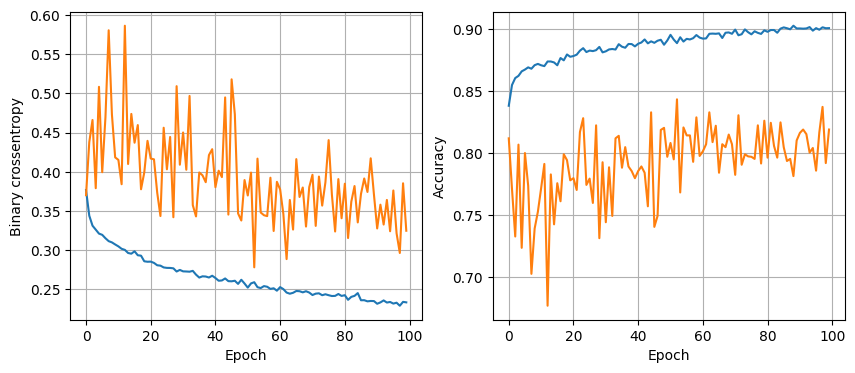

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8660 - loss: 0.3759
32 nodes, dropout 0, lr 0.01, batch size 128


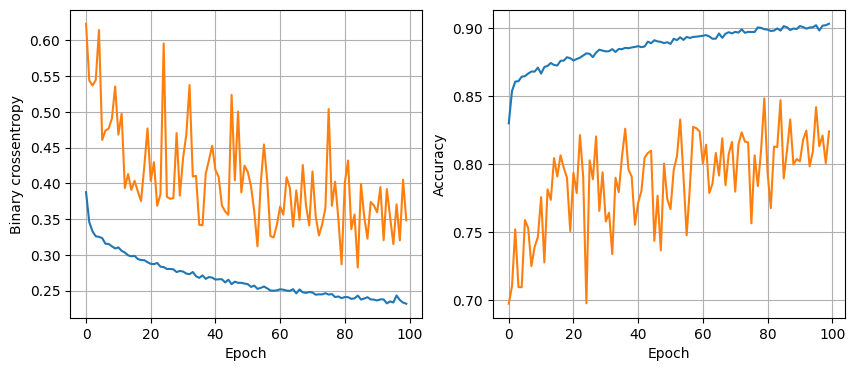

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8573 - loss: 0.3842
32 nodes, dropout 0, lr 0.005, batch size 32


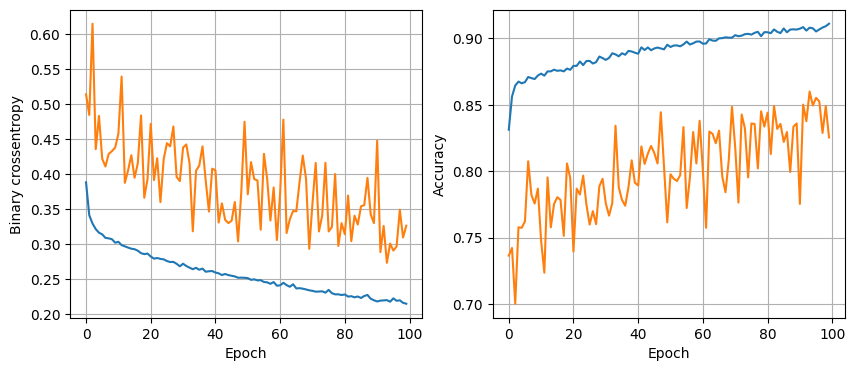

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8561 - loss: 0.3782
32 nodes, dropout 0, lr 0.005, batch size 64


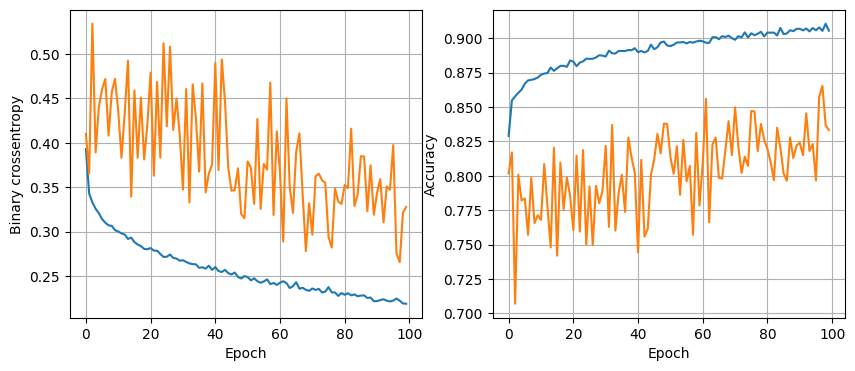

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8546 - loss: 0.3903
32 nodes, dropout 0, lr 0.005, batch size 128


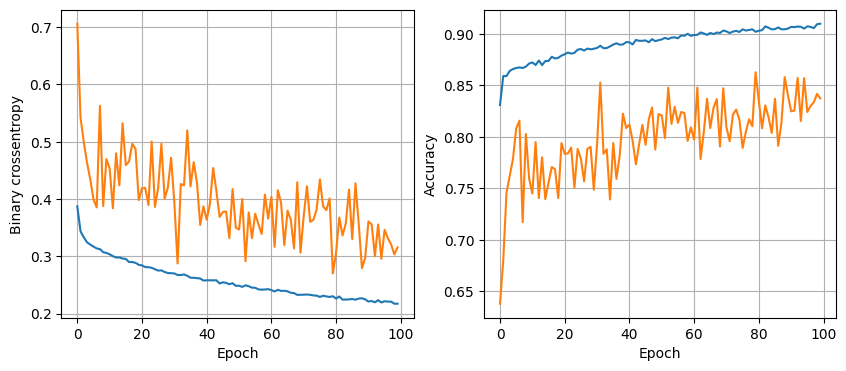

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 964us/step - accuracy: 0.8495 - loss: 0.3901
32 nodes, dropout 0, lr 0.001, batch size 32


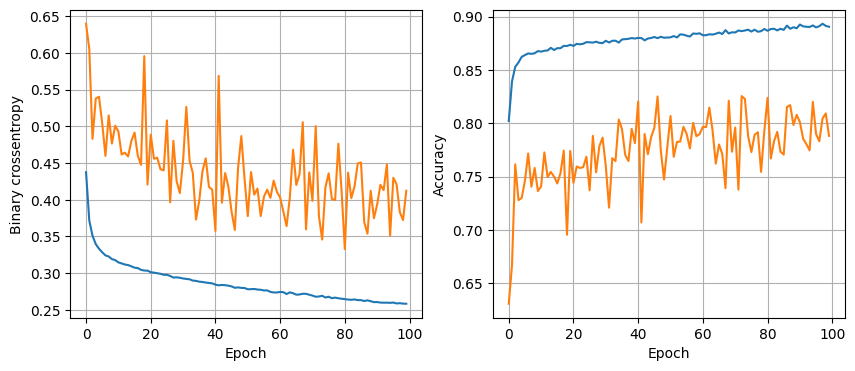

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8594 - loss: 0.3203
32 nodes, dropout 0, lr 0.001, batch size 64


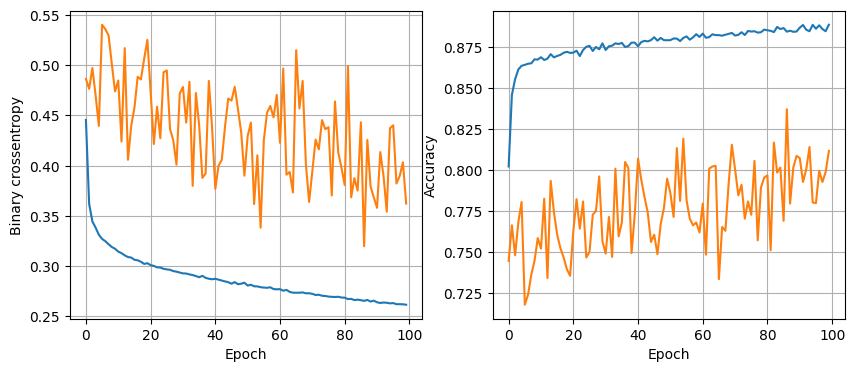

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.8529 - loss: 0.3305
32 nodes, dropout 0, lr 0.001, batch size 128


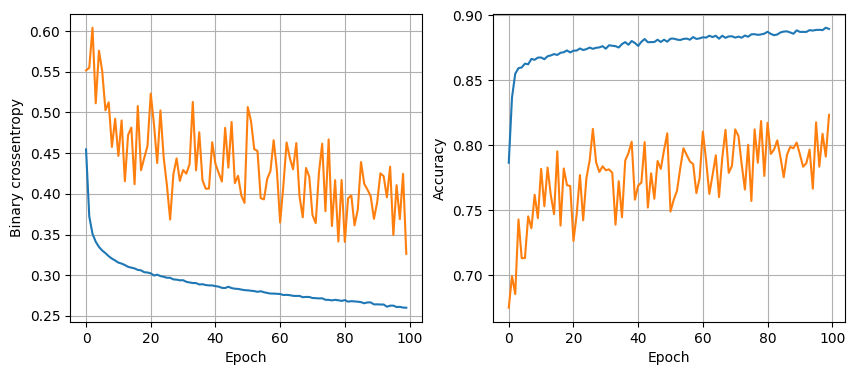

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8575 - loss: 0.3385  
32 nodes, dropout 0.2, lr 0.01, batch size 32


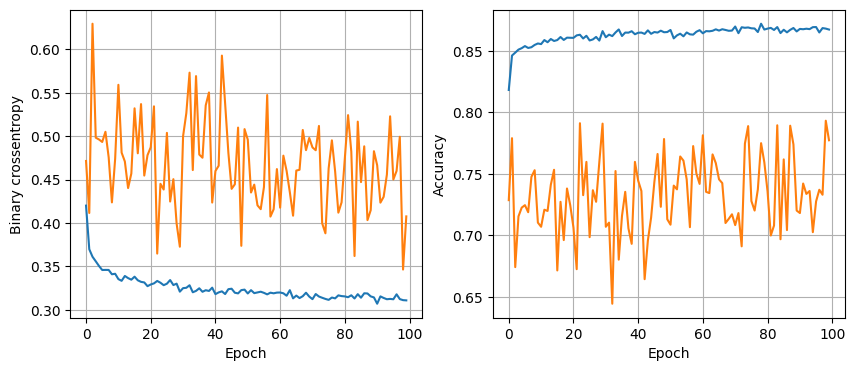

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8694 - loss: 0.3143
32 nodes, dropout 0.2, lr 0.01, batch size 64


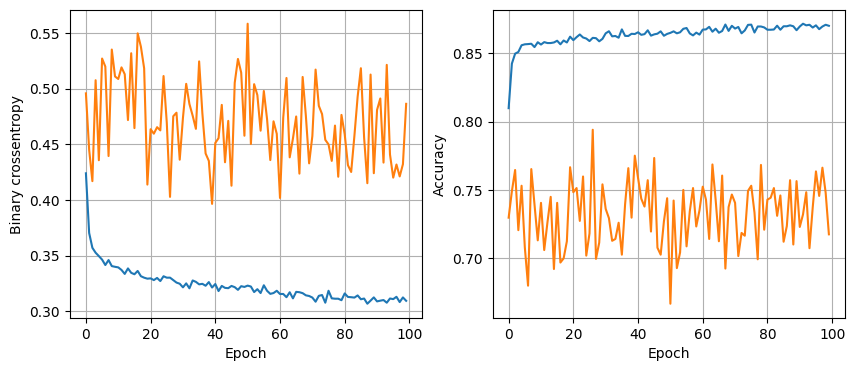

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8735 - loss: 0.3162
32 nodes, dropout 0.2, lr 0.01, batch size 128


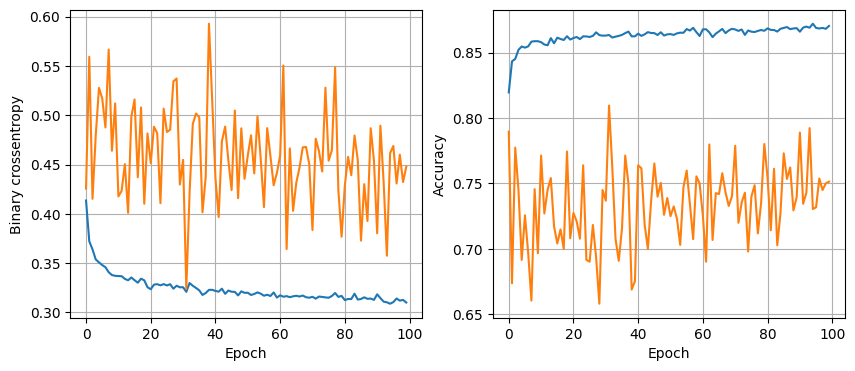

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.8688 - loss: 0.3097
32 nodes, dropout 0.2, lr 0.005, batch size 32


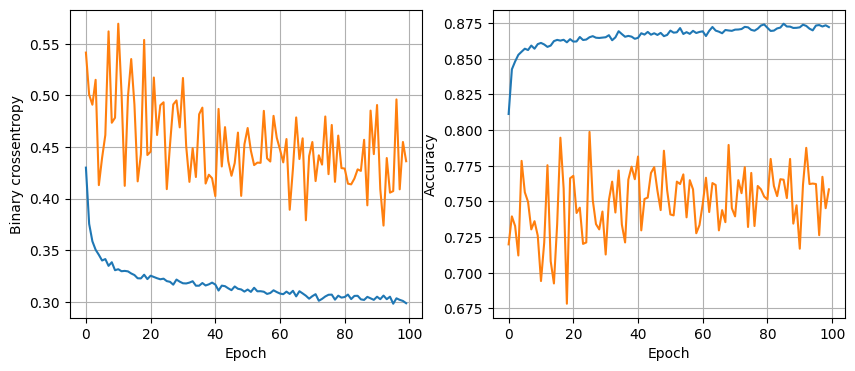

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8710 - loss: 0.3021
32 nodes, dropout 0.2, lr 0.005, batch size 64


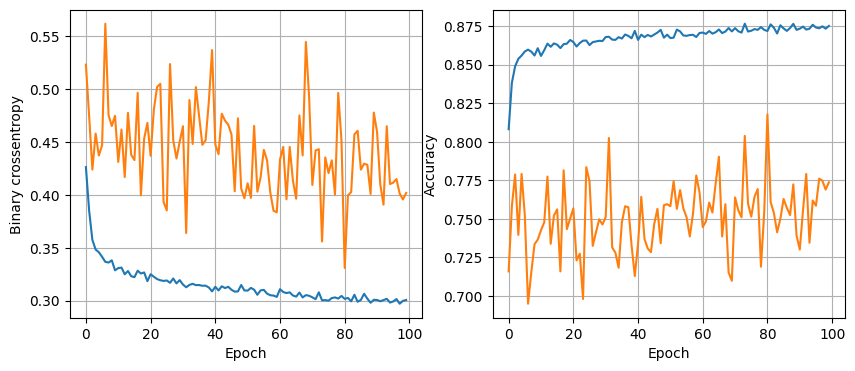

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - accuracy: 0.8770 - loss: 0.2980
32 nodes, dropout 0.2, lr 0.005, batch size 128


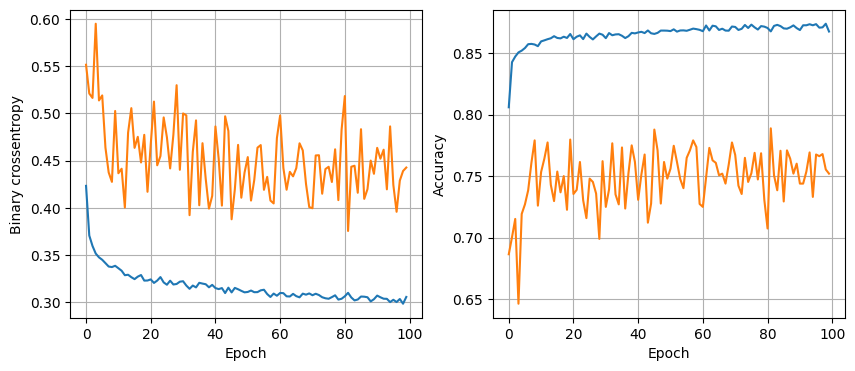

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - accuracy: 0.8740 - loss: 0.2968
32 nodes, dropout 0.2, lr 0.001, batch size 32


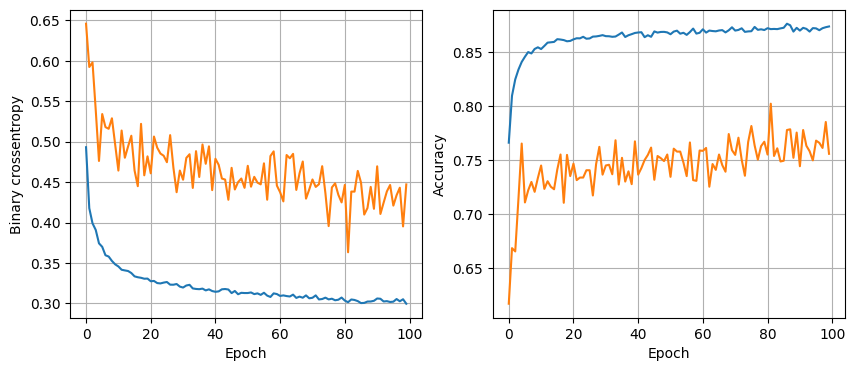

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8726 - loss: 0.2997
32 nodes, dropout 0.2, lr 0.001, batch size 64


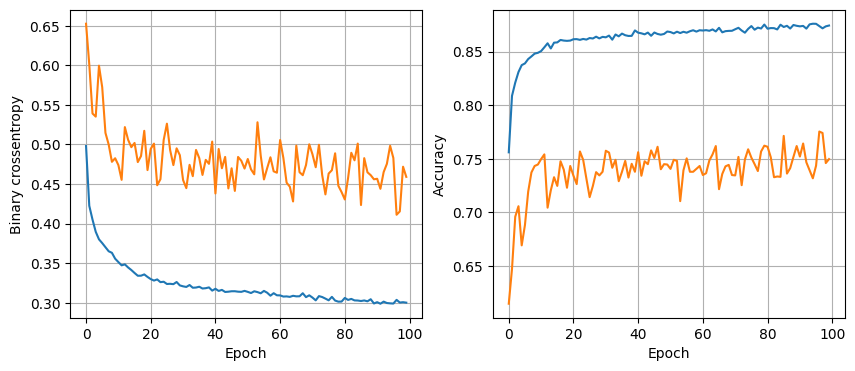

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8749 - loss: 0.2949  
32 nodes, dropout 0.2, lr 0.001, batch size 128


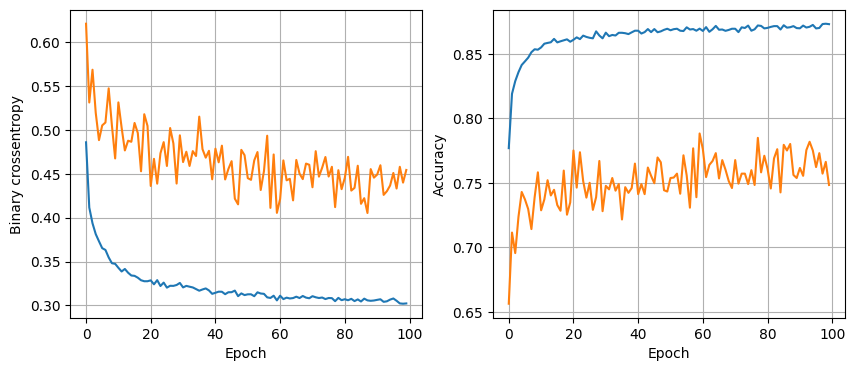

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8726 - loss: 0.3005
64 nodes, dropout 0, lr 0.01, batch size 32


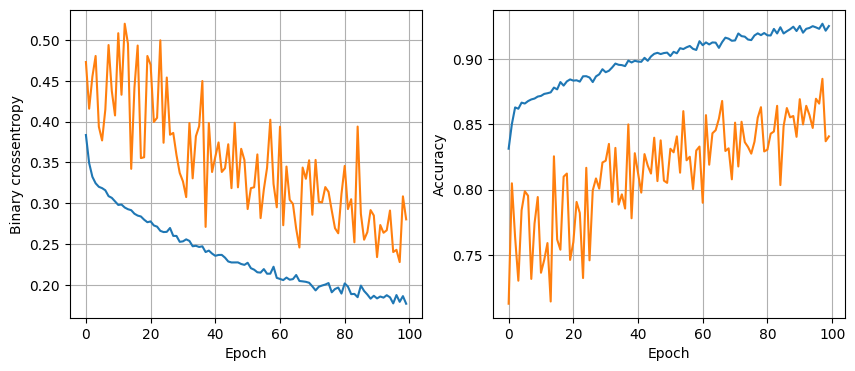

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8517 - loss: 0.5274
64 nodes, dropout 0, lr 0.01, batch size 64


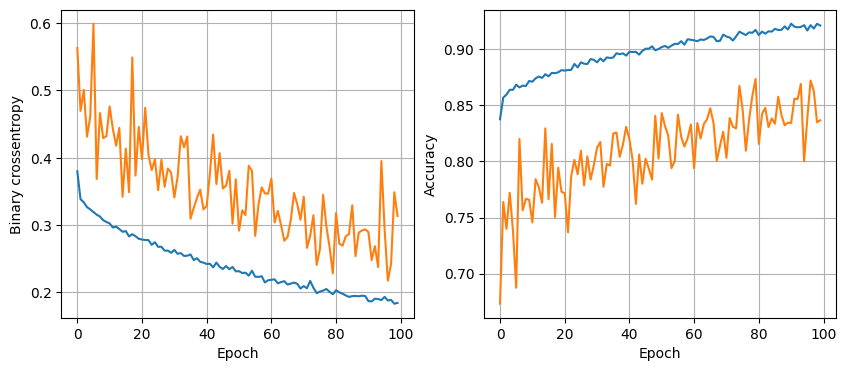

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8538 - loss: 0.4992
64 nodes, dropout 0, lr 0.01, batch size 128


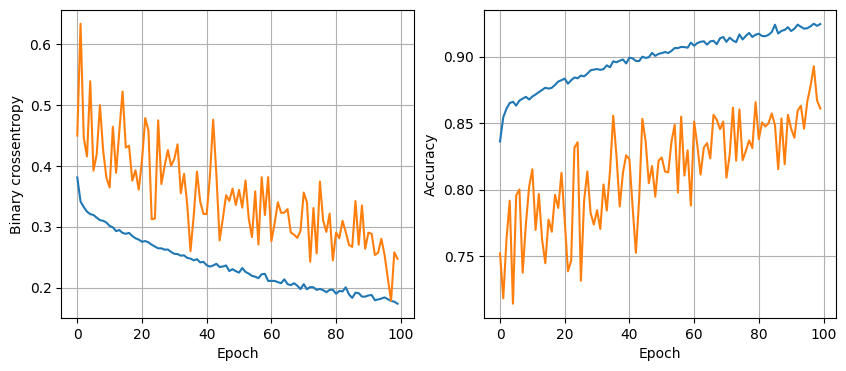

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8423 - loss: 0.5176
64 nodes, dropout 0, lr 0.005, batch size 32


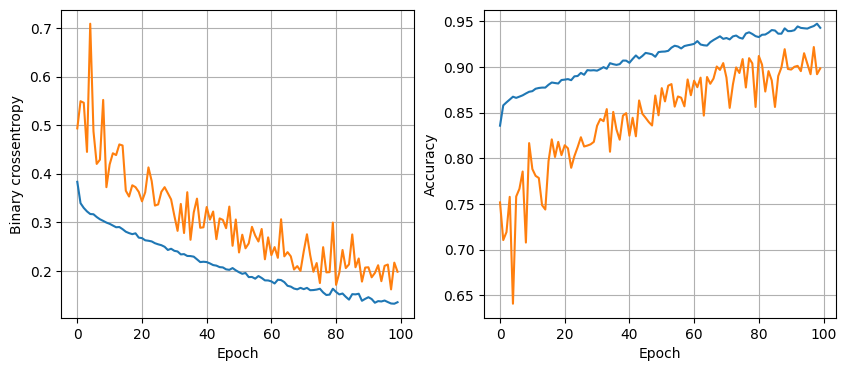

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8455 - loss: 0.6098
64 nodes, dropout 0, lr 0.005, batch size 64


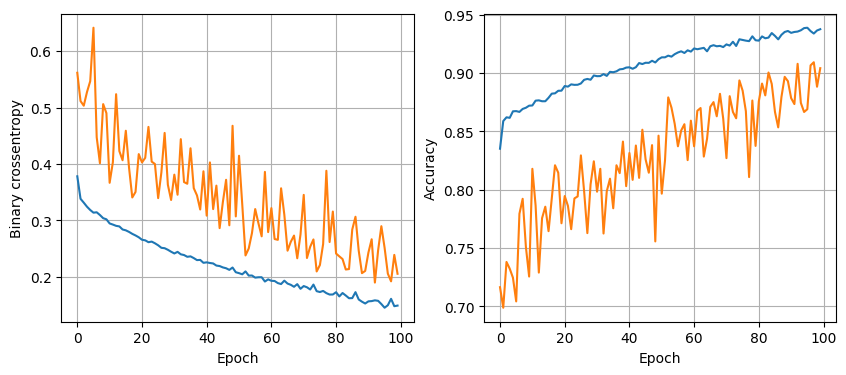

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8497 - loss: 0.5683
64 nodes, dropout 0, lr 0.005, batch size 128


In [ ]:
least_val_loss = float('inf')
least_lost_model = None
epochs = 100

for num_nodes in [16, 32, 64]:
    for dropout_prob in [0, 0.2]:
        for lr in  [0.01, 0.005, 0.001]:
            for batch_size in [32, 64, 128]: 
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(x_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_lost_model = model



In [ ]:
y_pred = least_lost_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(1,)

In [ ]:
y_pred